In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns',8000)
pd.set_option('display.max_rows',7000)

In [5]:
from google.colab import files
files.upload()

Saving Test_LqhgPWU.csv to Test_LqhgPWU.csv


{'Test_LqhgPWU.csv': b'ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1\n458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6\n458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6\n458996,Female,Yes,69,No,,0.0,Low,1.0,Cat_6\n459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6\n459001,Female,No,19,No,Marketing,,Low,4.0,Cat_6\n459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4\n459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6\n459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6\n459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6\n459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6\n459015,Male,No,22,No,Healthcare,0.0,Low,3.0,Cat_6\n459016,Female,No,22,No,Healthcare,0.0,Low,6.0,Cat_6\n459024,Male,Yes,50,Yes,Artist,1.0,Average,5.0,Cat_6\n459026,Male,No,27,No,Healthcare,8.0,Low,3.0,Cat_3\n459032,Male,No,18,No,Doctor,0.0,Low,3.0,Cat_6\n459033,Female,Yes,61,Yes,Artist,0.0,Low,1.0,Cat_6\n459036,Female,Yes,20,Yes,Lawyer,1.0,Average,3.0,Cat_3\n4590

In [26]:
dftrain=pd.read_csv('Train_aBjfeNk.csv')
dftest=pd.read_csv('Test_LqhgPWU.csv')

In [27]:
dftrain.shape

(8068, 11)

In [40]:
dftrain.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,15.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,15.0,High,6.0,Cat_6,A


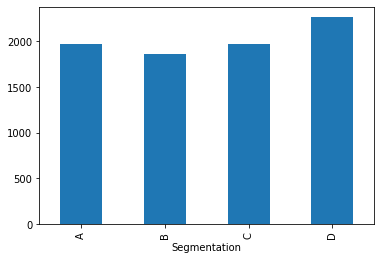

In [42]:
dftrain.groupby('Segmentation').size().plot(kind='bar')

In [39]:
dftest.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,missing values,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,15.0,Low,4.0,Cat_6


In [13]:
dftrain=dftrain.drop('ID', axis=1)

In [38]:
dftrain.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [37]:
dftrain.nunique()

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession           10
Work_Experience      16
Spending_Score        3
Family_Size          10
Var_1                 8
Segmentation          4
dtype: int64

In [18]:
dftrain['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [28]:
MA_columns=['Ever_Married','Graduated','Profession','Work_Experience','Family_Size','Var_1']

Ever_Married='mode'
Graduated='mode'
Profession='missing values'
Work_Experience=15
Family_Size=10
Var_1='Cat_8'

In [36]:
dftest.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [34]:
dftrain['Ever_Married']=dftrain['Ever_Married'].interpolate(method='bfill')
dftrain['Graduated']=dftrain['Graduated'].interpolate(method='bfill')

In [29]:
dftrain['Profession']=dftrain['Profession'].fillna(Profession)
dftrain['Work_Experience']=dftrain['Work_Experience'].fillna(Work_Experience)
dftrain['Family_Size']=dftrain['Family_Size'].fillna(Family_Size)
dftrain['Var_1']=dftrain['Var_1'].fillna(Var_1)

In [ ]:
### Filling Missing values of test

In [35]:
dftest['Ever_Married']=dftest['Ever_Married'].interpolate(method='bfill')
dftest['Graduated']=dftest['Graduated'].interpolate(method='bfill')

In [30]:
dftest['Profession']=dftest['Profession'].fillna(Profession)
dftest['Work_Experience']=dftest['Work_Experience'].fillna(Work_Experience)
dftest['Family_Size']=dftest['Family_Size'].fillna(Family_Size)
dftest['Var_1']=dftest['Var_1'].fillna(Var_1)

In [48]:
ordinal_columns=['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']

In [49]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
X_train_feautres=enc.fit_transform(dftrain[ordinal_columns])

In [50]:
df_train1=pd.DataFrame(X_train_feautres, columns=ordinal_columns)

In [51]:
dftrain=dftrain.drop(labels=ordinal_columns, axis=1)

In [52]:
frames=[dftrain,df_train1]
df_train = pd.concat(frames,axis=1)
print(df_train.shape)

(8068, 11)


In [60]:
df_train.head()

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
0,462809,22,1.0,4.0,3,1.0,0.0,0.0,5.0,2.0,3.0
1,462643,38,15.0,3.0,0,0.0,1.0,1.0,2.0,0.0,3.0
2,466315,67,1.0,1.0,1,0.0,1.0,1.0,2.0,2.0,5.0
3,461735,67,0.0,2.0,1,1.0,1.0,1.0,7.0,1.0,5.0
4,462669,40,15.0,6.0,0,0.0,1.0,1.0,3.0,1.0,5.0


In [61]:
df_test.head()

,ID,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
0,458989,36,0.0,1.0,0.0,1.0,1.0,2.0,2.0,5.0
1,458994,37,8.0,4.0,1.0,1.0,1.0,5.0,0.0,5.0
2,458996,69,0.0,1.0,0.0,1.0,0.0,9.0,2.0,5.0
3,459000,59,11.0,2.0,1.0,1.0,0.0,4.0,1.0,5.0
4,459001,19,15.0,4.0,0.0,0.0,0.0,8.0,2.0,5.0


In [55]:
X_test_feautres=enc.fit_transform(dftest[ordinal_columns])

In [57]:
df_test1=pd.DataFrame(X_test_feautres, columns=ordinal_columns)
dftest=dftest.drop(labels=ordinal_columns, axis=1)
frames1=[dftest,df_test1]
df_test = pd.concat(frames1,axis=1)
print(df_test.shape)

(2627, 10)


In [58]:
print(df_train.shape)
print(df_test.shape)

(8068, 11)
(2627, 10)


In [59]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df_train['Segmentation']=Le.fit_transform(df_train['Segmentation'])

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0819c0160>,
      dtype=object)

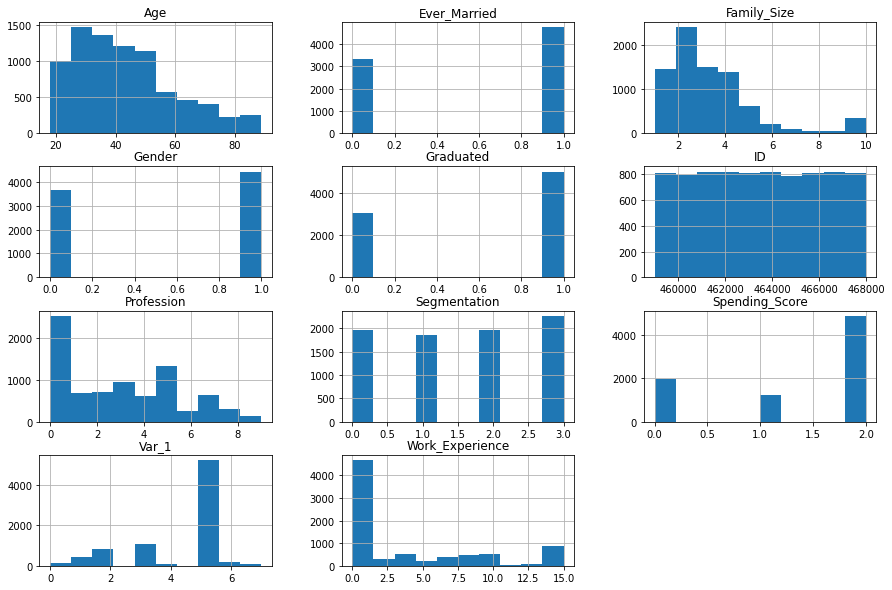

In [65]:
pd.plotting.hist_frame(df_train,figsize=(15,10))

In [66]:
predictors=['Age','Work_Experience','Family_Size','Gender',	'Ever_Married',	'Graduated','Profession','Spending_Score','Var_1']

Target=['Segmentation']

X=df_train[predictors].values
y=df_train[Target].values


In [67]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1614 1615 1616 ... 8065 8066 8067] TEST: [   0    1    2 ... 1611 1612 1613]
TRAIN: [   0    1    2 ... 8065 8066 8067] TEST: [1614 1615 1616 ... 3225 3226 3227]
TRAIN: [   0    1    2 ... 8065 8066 8067] TEST: [3228 3229 3230 ... 4839 4840 4841]
TRAIN: [   0    1    2 ... 8065 8066 8067] TEST: [4842 4843 4844 ... 6452 6453 6454]
TRAIN: [   0    1    2 ... 6452 6453 6454] TEST: [6455 6456 6457 ... 8065 8066 8067]


In [90]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [113]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(np.reshape(y_train,(-1,1)))
y_test=torch.LongTensor(np.reshape(y_test,(-1,1)))

In [114]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=9,hidden1=20,hidden2=20,out_features=4):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [115]:
torch.manual_seed(40)
model=ANN_Model()

In [116]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=9, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=4, bias=True)
)>

In [121]:
loss_function=nn.MultiLabelSoftMarginLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [122]:
epochs=1000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 0.6025729775428772
Epoch number: 11 and the loss : -9.167661666870117
Epoch number: 21 and the loss : -52.60148620605469
Epoch number: 31 and the loss : -182.8844757080078
Epoch number: 41 and the loss : -484.8023986816406
Epoch number: 51 and the loss : -1077.1868896484375
Epoch number: 61 and the loss : -2109.675048828125
Epoch number: 71 and the loss : -3757.297607421875
Epoch number: 81 and the loss : -6214.70849609375
Epoch number: 91 and the loss : -9691.013671875
Epoch number: 101 and the loss : -14405.5078125
Epoch number: 111 and the loss : -20584.3515625
Epoch number: 121 and the loss : -28457.986328125
Epoch number: 131 and the loss : -38259.23828125
Epoch number: 141 and the loss : -50221.8671875
Epoch number: 151 and the loss : -64579.5859375
Epoch number: 161 and the loss : -81565.1796875
Epoch number: 171 and the loss : -101410.078125
Epoch number: 181 and the loss : -124343.796875
Epoch number: 191 and the loss : -150593.890625
Epoch numbe

Text(0.5, 0, 'Epoch')

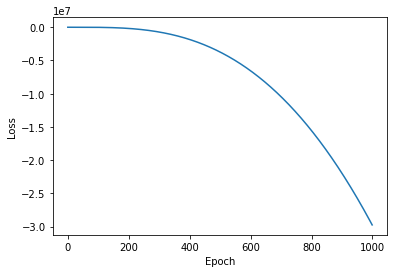

In [123]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [124]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
      prediction=model(data)
      predictions.append(prediction.argmax().item())

In [125]:
print("The classification report",metrics.classification_report(y_test,predictions))
print("The confusion Matrix",metrics.confusion_matrix(y_test,predictions))
print("The confusion Matrix",metrics.accuracy_score(y_test,predictions))

The classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00       391
           1       0.22      1.00      0.37       362
           2       0.00      0.00      0.00       410
           3       0.00      0.00      0.00       450

    accuracy                           0.22      1613
   macro avg       0.06      0.25      0.09      1613
weighted avg       0.05      0.22      0.08      1613

The confusion Matrix [[  0 391   0   0]
 [  0 362   0   0]
 [  0 410   0   0]
 [  0 450   0   0]]
The confusion Matrix 0.22442653440793553
